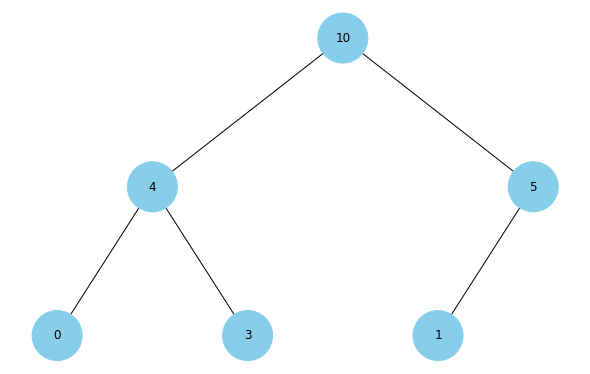

In [1]:
#Завдання 4
import uuid

import networkx as nx
import matplotlib.pyplot as plt

class Node:
    def __init__(self, key, color="skyblue"):
        self.left = None
        self.right = None
        self.val = key
        self.color = color  # Додатковий аргумент для зберігання кольору вузла
        self.id = str(uuid.uuid4())  # Унікальний ідентифікатор для кожного вузла

def add_edges(graph, node, pos, x=0, y=0, layer=1):
    if node is not None:
        graph.add_node(node.id, color=node.color, label=node.val)  # Використання id та збереження значення вузла
        if node.left:
            graph.add_edge(node.id, node.left.id)
            l = x - 1 / 2 ** layer
            pos[node.left.id] = (l, y - 1)
            l = add_edges(graph, node.left, pos, x=l, y=y - 1, layer=layer + 1)
        if node.right:
            graph.add_edge(node.id, node.right.id)
            r = x + 1 / 2 ** layer
            pos[node.right.id] = (r, y - 1)
            r = add_edges(graph, node.right, pos, x=r, y=y - 1, layer=layer + 1)
    return graph

def draw_tree(tree_root):
    tree = nx.DiGraph()
    pos = {tree_root.id: (0, 0)}
    tree = add_edges(tree, tree_root, pos)

    colors = [node[1]['color'] for node in tree.nodes(data=True)]
    labels = {node[0]: node[1]['label'] for node in tree.nodes(data=True)}  # Використовуйте значення вузла для міток

    plt.figure(figsize=(8, 5))
    nx.draw(tree, pos=pos, labels=labels, arrows=False, node_size=2500, node_color=colors)
    plt.show()



###############################################################
def build_max_heap_from_array(arr):
    root = None
    nodes = [None] * len(arr)

    for i in range(len(arr)):
        nodes[i] = Node(arr[i])

    for i in range(len(arr)):
        if 2 * i + 1 < len(arr):
            nodes[i].left = nodes[2 * i + 1]
        if 2 * i + 2 < len(arr):
            nodes[i].right = nodes[2 * i + 2]

    for i in range(len(arr) // 2 - 1, -1, -1):
        heapify(nodes, len(arr), i)

    root = nodes[0]
    return root

def heapify(nodes, n, i):
    largest = i
    left_child = 2 * i + 1
    right_child = 2 * i + 2

    if left_child < n and nodes[left_child].val > nodes[largest].val:
        largest = left_child

    if right_child < n and nodes[right_child].val > nodes[largest].val:
        largest = right_child

    if largest != i:
        nodes[i].val, nodes[largest].val = nodes[largest].val, nodes[i].val
        heapify(nodes, n, largest)

def tree_to_array(node):
    def in_order_traversal(node, result):
        if node is not None:
            in_order_traversal(node.left, result)
            result.append(node.val)
            in_order_traversal(node.right, result)

    result = []
    if node is not None:
        in_order_traversal(node.left, result)
        result.append(node.val)
        in_order_traversal(node.right, result)

    return result


root = Node(0)
root.left = Node(4)
root.left.left = Node(5)
root.left.right = Node(10)
root.right = Node(1)
root.right.left = Node(3)

arr = tree_to_array(root) # or arr = [0, 4, 5, 1, 3]
new_root = build_max_heap_from_array(arr)

draw_tree(new_root)